In [2]:
import pandas as pd
import numpy as np
from itertools import groupby
import matplotlib.pyplot as plt
import matplotlib

#设置中文及负号
plt.rcParams['font.sans-serif']=['Microsoft YaHei'] 
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['font.family']='Microsoft YaHei'
%matplotlib inline

In [3]:
# 导入天猫成交量数据
data = pd.read_csv('./data/tmall_order_report.csv')
data.head(100)  #不用print

,订单编号,总金额,买家实际支付金额,收货地址,订单创建时间,订单付款时间,退款金额
0,1,178.8,0.0,上海,2020-02-21 00:00:00,NaN,0.0
1,2,21.0,21.0,内蒙古自治区,2020-02-20 23:59:54,2020-02-21 00:00:02,0.0
2,3,37.0,0.0,安徽省,2020-02-20 23:59:35,NaN,0.0
3,4,157.0,157.0,湖南省,2020-02-20 23:58:34,2020-02-20 23:58:44,0.0
4,5,64.8,0.0,江苏省,2020-02-20 23:57:04,2020-02-20 23:57:11,64.8
...,...,...,...,...,...,...,...
95,96,37.0,0.0,北京,2020-02-20 23:18:40,2020-02-20 23:19:17,37.0
96,97,215.0,215.0,江苏省,2020-02-20 23:18:40,2020-02-20 23:18:51,0.0
97,98,69.0,69.0,河北省,2020-02-20 23:18:24,2020-02-20 23:18:30,0.0
98,99,53.0,53.0,江苏省,2020-02-20 23:18:10,2020-02-20 23:18:17,0.0


In [4]:
# 去除数据中的空格
new_columns = [col.strip() for col in data.columns]
data.columns = new_columns
#查看信息
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28010 entries, 0 to 28009
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   订单编号      28010 non-null  int64  
 1   总金额       28010 non-null  float64
 2   买家实际支付金额  28010 non-null  float64
 3   收货地址      28010 non-null  object 
 4   订单创建时间    28010 non-null  object 
 5   订单付款时间    24087 non-null  object 
 6   退款金额      28010 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 1.5+ MB


,订单编号,总金额,买家实际支付金额,退款金额
count,28010.000000,28010.000000,28010.000000,28010.000000
mean,14005.500000,106.953253,67.921712,20.433271
std,8085.934856,1136.587094,151.493434,71.501963
min,1.000000,1.000000,0.000000,0.000000
25%,7003.250000,38.000000,0.000000,0.000000
50%,14005.500000,75.000000,45.000000,0.000000
75%,21007.750000,119.000000,101.000000,0.000000
max,28010.000000,188320.000000,16065.000000,3800.000000


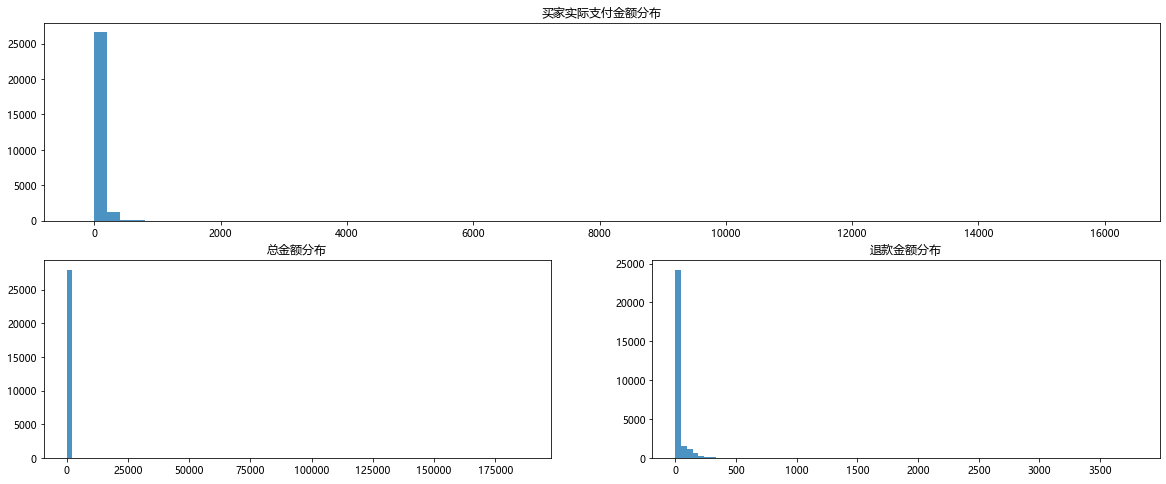

In [15]:
# 查看一下数据的分布
plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
plt.title('买家实际支付金额分布')
plt.hist(data['买家实际支付金额'], bins=80, histtype="stepfilled", alpha=.8)
plt.subplot(2,2,3)
plt.title('总金额分布')
plt.hist(data['总金额'], bins=80, histtype="stepfilled", alpha=.8)
plt.subplot(2,2,4)
plt.title('退款金额分布')
plt.hist(data['退款金额'], bins=80, histtype="stepfilled", alpha=.8)
plt.show()
### 可以看到金额的分布不是很均匀，有一些过大的值

In [6]:
print('数据的时间区间为：',data['订单创建时间'].min(),'-',data['订单创建时间'].max())
print('买家共分布在我国的{}个省份,'.format(data['收货地址'].nunique()),'分别为：',set(data['收货地址']))

# 把地名精简一下
data['收货地址'] = data.收货地址.apply(lambda x:x.strip('省|自治区'))
data['收货地址'] = data.收货地址.replace(['新疆维吾尔','广西壮族','宁夏回族'],['新疆','广西','宁夏'])

数据的时间区间为： 2020-02-01 00:14:15 - 2020-02-29 23:59:18
买家共分布在我国的31个省份, 分别为： {'广东省', '江西省', '江苏省', '天津', '浙江省', '重庆', '河北省', '四川省', '陕西省', '甘肃省', '安徽省', '西藏自治区', '吉林省', '湖北省', '内蒙古自治区', '上海', '河南省', '新疆维吾尔自治区', '北京', '海南省', '广西壮族自治区', '辽宁省', '贵州省', '黑龙江省', '湖南省', '云南省', '山西省', '青海省', '山东省', '宁夏回族自治区', '福建省'}


{'山东省': 1145, '河北省': 686, '广西壮族自治区': 278, '湖北省': 18, '重庆': 691, '海南省': 119, '辽宁省': 812, '上海': 2470, '福建省': 315, '宁夏回族自治区': 32, '内蒙古自治区': 136, '浙江省': 1438, '湖南省': 747, '四川省': 1380, '山西省': 317, '安徽省': 392, '云南省': 528, '广东省': 1585, '天津': 838, '河南省': 607, '吉林省': 260, '陕西省': 359, '江苏省': 1459, '黑龙江省': 231, '青海省': 15, '江西省': 256, '甘肃省': 108, '北京': 1489, '新疆维吾尔自治区': 16, '贵州省': 228}


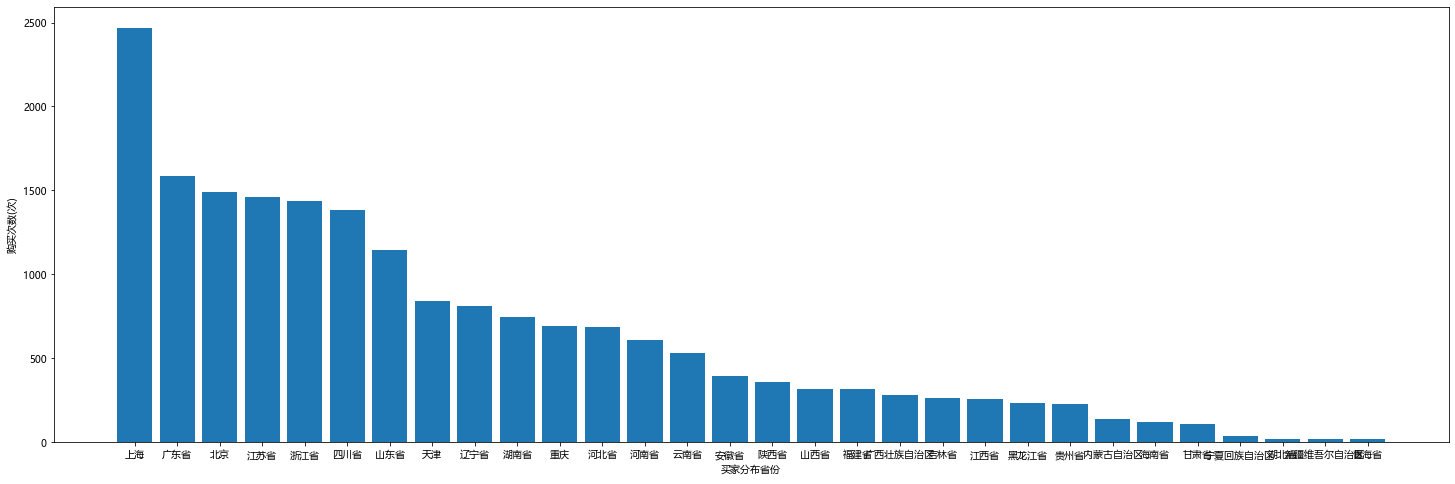

In [49]:
#计算一下购买次数最多的省份
shengfen = []
for y in range(len(data)):
    if data['买家实际支付金额'][y] !=0:
        shengfen.append(data['收货地址'][y])
# print(shengfen)  #花钱的省份的list

# 利用字典进行计数
shengfen_set = set(shengfen)
shengfen_dict = {}
for item in shengfen_set:
    shengfen_dict.update({item:shengfen.count(item)})
print(shengfen_dict)   #统计得到的省份：购买次数的字典形式
shengfen_dict = sorted(shengfen_dict.items(), key=lambda x: x[1], reverse=True)  #按照values的大小排序
shengfen_dict = dict(shengfen_dict)

#绘制各省购买次数的直方图,并按照大小排序
plt.figure(figsize=(25,8))
xx = np.linspace(1,29,30)
yy = list(shengfen_dict.values())
x_label = list(shengfen_dict.keys())
plt.xticks(xx,x_label)
plt.xlabel('买家分布省份')
plt.ylabel('购买次数(次)')
plt.bar(xx,yy)
plt.show()

{'山东省': 264039.7799999998, '河北省': 53633.84000000003, '广西壮族自治区': 13683.04, '湖北省': 153395.5399999999, '重庆': 35772.600000000006, '海南省': 150454.3299999999, '辽宁省': 97909.5, '上海': 4202.0, '福建省': 40926.44000000002, '宁夏回族自治区': 138870.03999999998, '内蒙古自治区': 43290.90000000001, '浙江省': 189743.9399999999, '湖南省': 37668.90000000001, '四川省': 3086.44, '山西省': 155093.57999999987, '安徽省': 36676.9, '云南省': 68295.61000000006, '广东省': 80757.40000000005, '天津': 169755.89999999997, '河南省': 18552.300000000003, '吉林省': 5808.0, '陕西省': 68088.38000000005, '江苏省': 13684.599999999995, '黑龙江省': 31479.70000000002, '青海省': 114.0, '江西省': 27387.849999999995, '甘肃省': 77298.53000000003, '北京': 89870.29999999999, '新疆维吾尔自治区': 42085.40000000005, '西藏自治区': 988.0, '贵州省': 29012.27}
{'山东省': 264039.7799999998, '浙江省': 189743.9399999999, '天津': 169755.89999999997, '山西省': 155093.57999999987, '湖北省': 153395.5399999999, '海南省': 150454.3299999999, '宁夏回族自治区': 138870.03999999998, '辽宁省': 97909.5, '北京': 89870.29999999999, '广东省': 80757.40000000005, '甘肃省': 77

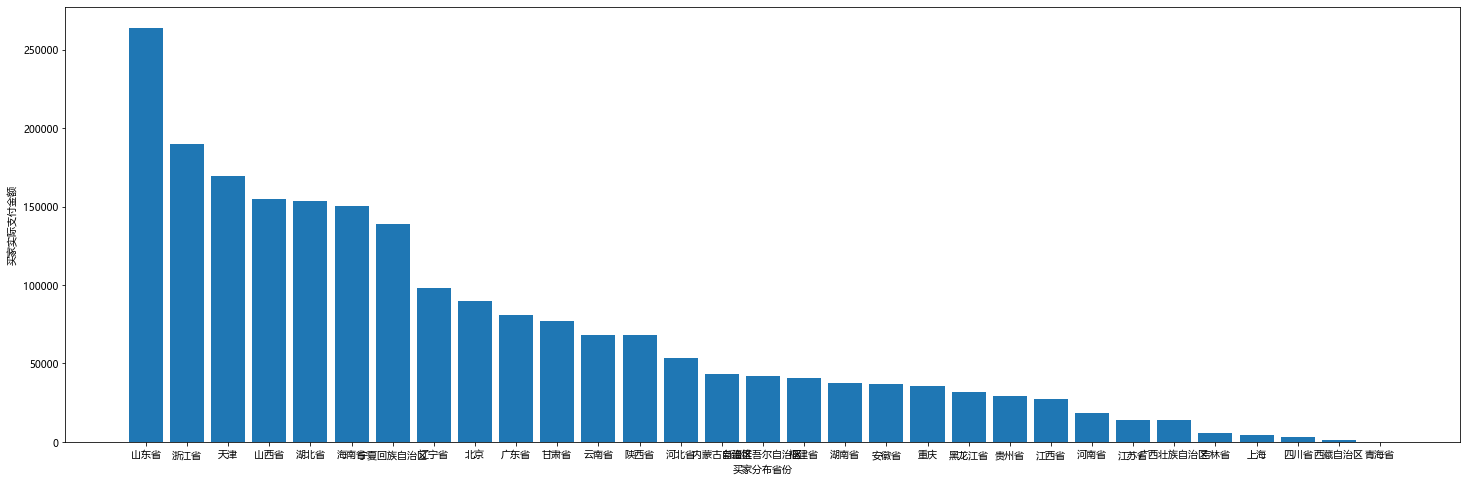

In [52]:
#分析一下花钱最多的省份和退款最多的省份
#用到的数据：data['买家实际支付金额']   data['收货地址']    data['退款金额']

#  将具有重复元素的两个列表组合成字典
aa = list(data['收货地址'])
bb = list(data['买家实际支付金额'])
aa_sorted = sorted(aa) # ['a', 'a', 'a', 'b', 'b']
index = sorted(range(len(aa)),key = lambda  k:aa[k] ) # array([0, 1, 3, 2, 4], dtype=int64)
bb_sorted = np.array(bb)[index].tolist() # [1, 2, 4, 3, 3]
 
aa_sorted_binded = [list(j) for i,j in groupby(aa_sorted)] # [['a', 'a', 'a'], ['b', 'b']]
index = [[0]]
index.append([len(ele) for ele in aa_sorted_binded]) # [[0], [3, 2]]
index = sum(index,[]) # [0, 3, 2]
bb_sorted_binded = [bb_sorted[index[i]:index[i]+index[i+1]] for i in range(len(index)-1)] # [[1, 2, 4], [3, 3]]
result = dict(zip(list(set(aa)),bb_sorted_binded)) # {'a': [1, 2, 4], 'b': [3, 3]}  
# print(result)

#  把字典中同一key对应的多个values合并
sheng = list(result.keys())
value = []
for values in result.values():
    value.append(sum(values))

dictionary = dict(zip(sheng, value))
print(dictionary)

dictionary1 = sorted(dictionary.items(), key=lambda x: x[1], reverse=True)  #按照values的大小排序
dictionary1 = dict(dictionary1)
print(dictionary1)

#绘制各省购买钱数的柱状图
plt.figure(figsize=(25,8))
xx = np.linspace(1,30,31)
yy = list(dictionary1.values())
x_label = list(dictionary1.keys())
plt.xticks(xx,x_label)
plt.xlabel('买家分布省份')
plt.ylabel('买家实际支付金额')
plt.bar(xx,yy)
plt.show()

In [7]:
# 成交金额在时间维度的变化

# 提取日期中的时间为后续分析做准备
data['订单创建时间'] = data['订单创建时间'].astype('datetime64')
data['订单付款时间'] = data['订单付款时间'].astype('datetime64')

data['月'] = data['订单付款时间'].dt.month
data['日'] = data['订单付款时间'].dt.day
data2 = data[~data['订单付款时间'].isnull()]
data2['月'] = data2['月'].apply(lambda x:int(x)).astype('str')
data2['日'] = data2['日'].apply(lambda x:int(x)).astype('str')
data2['日期'] = data2['月'] + '月' + data2['日'] + '日'
data2['周'] = data2['订单付款时间'].dt.weekday + 1
data2['周'] = '星期' + data2['周'].astype('str')
data2['月'] = data2['月'].astype('int')
data2['日'] = data2['日'].astype('int')
data2 = data2.sort_values(by = '订单付款时间')
data2['小时'] = data2['订单付款时间'].dt.hour
data2.head()

D:\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
D:\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
D:\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

,订单编号,总金额,买家实际支付金额,收货地址,订单创建时间,订单付款时间,退款金额,月,日,日期,周,小时
6063,6064,38.0,0.0,四川省,2020-02-01 00:14:15,2020-02-01 00:14:20,38.0,2,1,2月1日,星期6,0
6062,6063,38.0,38.0,江苏省,2020-02-01 00:17:47,2020-02-01 00:17:58,0.0,2,1,2月1日,星期6,0
6061,6062,76.0,0.0,湖北省,2020-02-01 00:33:01,2020-02-01 00:33:08,76.0,2,1,2月1日,星期6,0
6060,6061,38.0,38.0,贵州省,2020-02-01 00:50:18,2020-02-01 00:50:25,0.0,2,1,2月1日,星期6,0
6059,6060,38.0,0.0,陕西省,2020-02-01 00:54:18,2020-02-01 00:54:23,38.0,2,1,2月1日,星期6,0


In [10]:
from pyecharts.charts import Pie,Bar,Line,Map,Map3D,Funnel
from pyecharts import options as opts
import seaborn as sns
from pyecharts.commons.utils import JsCode
from pyecharts.globals import ThemeType, ChartType


#使用 pyecharts 绘图
def echarts_line(x,y,title = '主标题',subtitle = '副标题',label = '图例'):
    """
    x: 函数传入x轴标签数据
    y：函数传入y轴数据
    title：主标题
    subtitle：副标题
    label：图例
    """
    line = Line(
        init_opts=opts.InitOpts(
            bg_color='#080b30',  # 设置背景颜色
            theme='dark'         # 设置主题
            # width='980px',     # 设置图的宽度
            # height='800px'     # 设置图的高度
        )
    )
    line.add_xaxis(x)
    line.add_yaxis(
        label,
        y,
        is_symbol_show=False,  # 是否显示数据标签点
        is_smooth=True,        # 设置曲线平滑
        label_opts=opts.LabelOpts(
            is_show=False,     # 是否显示数据
        ),
        itemstyle_opts=opts.ItemStyleOpts(color='#00ca95'),  # 设置系列颜色
        # 线条粗细阴影设置
        linestyle_opts={
            "normal": {
                "color": "#4ADEDE",  #线条颜色
                "shadowColor": 'rgba(0, 0, 0, .3)', #阴影颜色和不透明度
                "shadowBlur": 2,     #阴影虚化大小
                "shadowOffsetY": 5,  #阴影y偏移量
                "shadowOffsetX": 5,  #阴影x偏移量
                "width": 6   # 线条粗细
            },
        },
        # 阴影设置
        areastyle_opts={
            "normal": {
                "color": JsCode("""new echarts.graphic.LinearGradient(0, 0, 0, 1, [{
                                offset: 0,
                                color: '#7BD5F5'
                            },
                            {
                                offset: 1,
                                color: 'rgba(0,202,149, 0)'
                            }
                        ], false)"""),  #设置底色色块渐变
                "shadowColor": 'rgba(0,202,149, 0.9)',  #设置底色阴影
                "shadowBlur": 20  #设置底色阴影大小
            }
        },
    )
    line.set_global_opts(
        # 标题设置
        title_opts=opts.TitleOpts(
            title=title, # 主标题
            subtitle=subtitle, # 副标题
            pos_left='center',  # 标题展示位置
            title_textstyle_opts=dict(color='#fff') # 设置标题字体颜色
        ),
        # 图例设置
        legend_opts=opts.LegendOpts(
            is_show=True, # 是否显示图例
            pos_left='right', # 图例显示位置
            pos_top='3%',  #图例距离顶部的距离
            orient='horizontal'  # 图例水平布局
        ),
    )
    return line.render_notebook()

change = data2[['买家实际支付金额','日']].groupby('日').sum().round(2).reset_index().sort_values(by = '日')
echarts_line(change['日'],change['买家实际支付金额'],title = '成交金额变化图',subtitle = "成交金额在时间维度上的变化",
            label = '成交金额')

In [11]:

def echarts_bar(x,y,title = '主标题',subtitle = '副标题',label = '图例'):
    """
    x: 函数传入x轴标签数据
    y：函数传入y轴数据
    title：主标题
    subtitle：副标题
    label：图例
    """
    bar = Bar(
            init_opts=opts.InitOpts(
            bg_color='#080b30',  # 设置背景颜色
            theme='dark'         # 设置主题
            # width='980px',     # 设置图的宽度
            # height='800px'     # 设置图的高度
        )
    )
    bar.add_xaxis(x)
    bar.add_yaxis(label,y,
        label_opts=opts.LabelOpts(is_show=True) # 是否显示数据
        ,category_gap="50%" # 柱子宽度设置
        ) 
    bar.set_series_opts( # 自定义图表样式
        label_opts=opts.LabelOpts(is_show=False), # 是否显示数据标签
        markpoint_opts=opts.MarkPointOpts(
            data=[
            opts.MarkPointItem(type_="min", name="最小值"), # 显示最小值标签
            opts.MarkPointItem(type_="max", name="最大值"), # 显示最大值标签
            opts.MarkPointItem(type_="average", name="平均值") # 显示均值标签
            ]
        ),
        itemstyle_opts={  
            "normal": {
                "color": JsCode(
                    """new echarts.graphic.LinearGradient(0, 0, 0, 1, [{
                        offset: 0,color: 'rgba(0, 244, 255, 1)'}
                        ,{offset: 1,color: 'rgba(0, 77, 167, 1)'}], false)
                    """
                ),       # 调整柱子颜色渐变
                "barBorderRadius": [100, 100, 100, 100],  # 调整柱子圆角弧度
                "shadowColor": "rgb(0, 160, 221)", # 调整阴影颜色
            }
        }
    )
    bar.set_global_opts(
        # 标题设置
        title_opts=opts.TitleOpts(
            title=title, # 主标题
            subtitle=subtitle, # 副标题
            pos_left='center',  # 标题展示位置
            title_textstyle_opts=dict(color='#fff') # 设置标题字体颜色
        ),
        # 图例设置
        legend_opts=opts.LegendOpts(
            is_show=True, # 是否显示图例
            pos_left='right', # 图例显示位置
            pos_top='3%',  #图例距离顶部的距离
            orient='horizontal'  # 图例水平布局
        ),
    )
    return bar.render_notebook()

In [14]:
week_change = data2[['周','买家实际支付金额']].groupby('周').sum().round(2).reset_index()
echarts_bar(week_change['周'].tolist(),week_change['买家实际支付金额'].tolist(),title = '订单成交金额平均每周对比',
            subtitle = '每周对比图',label = '成交金额')

In [15]:
hour_change = data2[['小时','买家实际支付金额']].groupby('小时').sum().round(2).reset_index()
echarts_line(hour_change['小时'],hour_change['买家实际支付金额'],title = '每天各时段成交金额变化图'
            ,subtitle = '一天24小时哪个时间段成交金额多',label = '成交金额')

In [83]:
change_map = data2[['收货地址','买家实际支付金额']].groupby('收货地址').sum().round(2).reset_index().sort_values(by = '买家实际支付金额',
                ascending = False)


def echarts_map(province,data,title = '主标题',subtitle = '副标题',label = '图例'):
    """
    province：传入省份List
    data：传入各省对应的数据List
    title：主标题
    subtitle：副标题
    label：图例
    """
    map_ = Map(
            init_opts=opts.InitOpts(
            bg_color='#080b30',  # 设置背景颜色
            theme='dark'         # 设置主题
            # width='980px',     # 设置图的宽度
            # height='800px'     # 设置图的高度
            )
    )
    map_.add(label,[list(i) for i in zip(province,data)])
    map_.set_global_opts(
        # 标题设置
        title_opts=opts.TitleOpts(
            title=title, # 主标题
            subtitle=subtitle, # 副标题
            pos_left='center',  # 标题展示位置
            title_textstyle_opts=dict(color='#fff') # 设置标题字体颜色
        ),
        # 图例设置
        legend_opts=opts.LegendOpts(
            is_show=True, # 是否显示图例
            pos_left='right', # 图例显示位置
            pos_top='3%',  #图例距离顶部的距离
            orient='horizontal'  # 图例水平布局
        ),
        visualmap_opts = opts.VisualMapOpts(max_ = int(data.max()),is_piecewise = False)
    )
    return map_.render_notebook()


echarts_map(change_map['收货地址'],change_map['买家实际支付金额'],title = '成交金额分布图'
            ,subtitle = '成交金额在全国各地分布情况',label = '成交金额')
echarts_map(local_back_money['收货地址'],local_back_money['退款金额'],title = '退款金额分布图'
            ,subtitle = '退款金额在全国各地分布情况',label = '退款金额')

In [74]:
##  转化率计数
create_order = data.订单编号.count()
print('创建订单数量为：',create_order)
buy_order = data2[~data2.订单付款时间.isnull()].订单编号.count()
print('支付订单数量为：',buy_order)
finish_order = data2[data2.买家实际支付金额 > 0].订单编号.count()
print('成交订单数量为：',finish_order)
whole_finish_order = data2[data2.总金额 == data2.买家实际支付金额].订单编号.count()
print('全额成交订单量为：',whole_finish_order)

##  计算转化率
print()
print('##########################转化率###################################')
print('创建订单—>支付订单的转化率为：{:.4}%'.format(buy_order*100/data.shape[0]))
print('创建订单—>订单成交的转化率为：{:.4}%'.format(finish_order*100/data.shape[0]))
print('创建订单—>全额成交订单的转化率为：{:.4}%'.format(whole_finish_order*100/data.shape[0]))

#用堆叠图展示转化率

trans_bar = (
    Bar(init_opts=opts.InitOpts(width="900px", height="500px"))#设置图表画布宽度
    .add_xaxis(['创建订单','付款订单','完成订单'])
    .add_yaxis("转化率", [int(buy_order*100/data.shape[0]),int(finish_order*100/data.shape[0]),int(whole_finish_order*100/data.shape[0])],bar_min_width=1,bar_max_width=50,color="#a834a8", stack="stack")
    .add_yaxis("所有订单", [15,33,35],color="#42b7bd", stack="stack",bar_min_width=11,is_selected=True)
    #设置标签属性
    .set_series_opts(
        label_opts=opts.LabelOpts(position="inside", color="white", font_size=18,font_style="normal",font_weight='normal',font_family='Times New Roman', formatter="{c}%"))     
    .set_global_opts(
        legend_opts=opts.LegendOpts(textstyle_opts=opts.LabelOpts(font_size=18,font_family='Times New Roman',font_weight='bold')),#设置图例属性
        #设置横纵坐标属性
        xaxis_opts=opts.AxisOpts(name_textstyle_opts=opts.TextStyleOpts(font_weight='bold',font_size=17,font_family='Times New Roman'),axislabel_opts=opts.LabelOpts(font_size=18,font_family='Times New Roman',font_weight="normal" ,rotate=19),interval=115,boundary_gap=['50%', '80%']),
        yaxis_opts=opts.AxisOpts(name_textstyle_opts=opts.TextStyleOpts(font_weight='bold',font_size=17,font_family='Times New Roman'),name="转化率",axislabel_opts=opts.LabelOpts(font_size=18,font_style="normal",font_weight="normal" ,font_family='Times New Romanrial'))
    )
)

trans_bar.render_notebook()


创建订单数量为： 28010
支付订单数量为： 24087
成交订单数量为： 18955
全额成交订单量为： 18441

##########################转化率###################################
创建订单—>支付订单的转化率为：85.99%
创建订单—>订单成交的转化率为：67.67%
创建订单—>全额成交订单的转化率为：65.84%


In [75]:
## 漏斗图显示转化率
transform = [['创建订单',round(create_order / data.shape[0],2)],
             ['支付订单',round(buy_order / data2.shape[0],2)],
             ['成交订单',round(finish_order / data2.shape[0],2)],
             ['全额成交订单',round(whole_finish_order / data2.shape[0],2)]]

funnel=Funnel(
        init_opts=opts.InitOpts(
        bg_color='#080b30',  # 设置背景颜色
        theme='dark',         # 设置主题
        # width='980px',     # 设置图的宽度
        # height='800px'     # 设置图的高度
        )
)
funnel.add("销售图",transform
        ,is_selected=True
        ,label_opts=opts.LabelOpts(position='inside', formatter='{b}：{c}'), # 设置文字显示在漏斗图内
    )
funnel.set_global_opts(
        # 标题设置
        title_opts=opts.TitleOpts(
            title='天猫2月销售订单转化率漏斗图', # 主标题
            subtitle=' ', # 副标题
            pos_left='center',  # 标题展示位置
            title_textstyle_opts=dict(color='#fff') # 设置标题字体颜色
        ),
        # 图例设置
        legend_opts=opts.LegendOpts(
            is_show=True, # 是否显示图例
            pos_left='right', # 图例显示位置
            pos_top='3%',  #图例距离顶部的距离
            orient='horizontal'  # 图例水平布局
        )
    )
funnel.render_notebook()